In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
traffic = pd.read_csv("data_1.csv") # traffic from 5AM to 10PM
# traffic_2 = pd.read_csv("data_2.csv")
# kwh = pd.read_csv("block_weather_avg_test.csv",index_col=0)

In [4]:
traffic

,Date Time,Segment ID,UTC Date Time,Speed(miles/hour),Hist Av Speed(miles/hour),Ref Speed(miles/hour),Travel Time(Minutes),CValue,Pct Score30,Pct Score20,Pct Score10,Road Closure,Corridor/Region Name
0,2020-01-01T05:00:00-08:00,1626612172,2020-01-01T13:00:00Z,50.0,50.0,53,0.27,NaN,0.0,100.0,0.0,F,santa clara study
1,2020-01-01T06:00:00-08:00,1626612172,2020-01-01T14:00:00Z,52.0,51.0,53,0.25,NaN,0.0,100.0,0.0,F,santa clara study
2,2020-01-01T07:00:00-08:00,1626612172,2020-01-01T15:00:00Z,39.0,52.0,53,0.33,NaN,0.0,100.0,0.0,F,santa clara study
3,2020-01-01T08:00:00-08:00,1626612172,2020-01-01T16:00:00Z,24.0,20.0,53,0.53,NaN,0.0,100.0,0.0,F,santa clara study
4,2020-01-01T09:00:00-08:00,1626612172,2020-01-01T17:00:00Z,50.0,47.0,53,0.27,100.0,22.0,78.0,0.0,F,santa clara study
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17005248,2020-02-28T17:00:00-08:00,169878874,2020-02-29T01:00:00Z,7.0,8.0,9,1.60,NaN,0.0,100.0,0.0,F,santa clara study
17005249,2020-02-28T18:00:00-08:00,169878874,2020-02-29T02:00:00Z,9.0,NaN,9,1.18,NaN,0.0,0.0,100.0,F,santa clara study
17005250,2020-02-28T19:00:00-08:00,169878874,2020-02-29T03:00:00Z,9.0,NaN,9,1.18,NaN,0.0,0.0,100.0,F,santa clara study
17005251,2020-02-28T20:00:00-08:00,169878874,2020-02-29T04:00:00Z,9.0,NaN,9,1.18,NaN,0.0,0.0,100.0,F,santa clara study


In [4]:
traffic = traffic[['Date Time', 'Segment ID', 'Speed(miles/hour)', 'Ref Speed(miles/hour)', 'CValue']]
traffic_2 = traffic_2[['Date Time', 'Segment ID', 'Speed(miles/hour)', 'Ref Speed(miles/hour)', 'CValue']]

In [11]:
traffic["Score"] = traffic["Speed(miles/hour)"] / traffic["Ref Speed(miles/hour)"]
traffic["Date Time"] = pd.to_datetime(traffic["Date Time"]).dt.tz_localize(None)
traffic["Date"] = traffic["Date Time"].dt.date
traffic["Time"] = traffic["Date Time"].dt.time

traffic_2["Score"] = traffic_2["Speed(miles/hour)"] / traffic_2["Ref Speed(miles/hour)"]
traffic_2["Date Time"] = pd.to_datetime(traffic_2["Date Time"]).dt.tz_localize(None)
traffic_2["Date"] = traffic_2["Date Time"].dt.date
traffic_2["Time"] = traffic_2["Date Time"].dt.time


In [12]:
together = pd.concat([traffic, traffic_2], axis=0)

In [6]:
kwh["Date"].unique()

array(['2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11',
       '2019-04-12', '2019-04-15', '2019-04-16', '2019-04-17',
       '2019-04-18', '2019-04-19', '2019-04-22', '2019-04-23',
       '2019-04-24', '2019-04-29', '2019-04-30', '2019-05-01',
       '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07',
       '2019-05-08', '2019-05-09', '2019-05-10', '2019-05-13',
       '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17',
       '2019-05-20', '2019-05-21', '2019-05-22', '2019-05-23',
       '2019-05-24', '2019-05-28', '2019-05-29', '2019-05-30',
       '2019-05-31', '2019-06-03', '2019-06-04', '2019-06-05',
       '2019-06-06', '2019-06-07', '2019-06-10', '2019-06-11',
       '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-17',
       '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21',
       '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27',
       '2019-06-28', '2019-07-01', '2019-07-02', '2019-07-03',
       '2019-07-05', '2019-07-08', '2019-07-09', '2019-

In [12]:
traffic["Score"] = traffic["Speed(miles/hour)"] / traffic["Ref Speed(miles/hour)"]
traffic["Date Time"] = pd.to_datetime(traffic["Date Time"]).dt.tz_localize(None)
traffic["Date"] = traffic["Date Time"].dt.date
traffic["Time"] = traffic["Date Time"].dt.time

In [13]:
kwh["Date Time"] = pd.to_datetime(kwh["Date"]).dt.tz_localize(None)
kwh["Date"] = kwh["Date Time"].dt.date

In [14]:
kwh_by_date = kwh.groupby("Date").agg({"kwh": "mean"})

In [16]:
confident_traffic = together.loc[together["CValue"] > 0.9]
mean_scores = confident_traffic.groupby(["Date", "Segment ID"])["Score"].apply(np.mean).reset_index()
day_scores = mean_scores.groupby("Date").agg({"Score": "mean"})

In [17]:
merged = pd.merge(kwh_by_date, day_scores, on="Date")

<AxesSubplot:xlabel='Score', ylabel='kwh'>

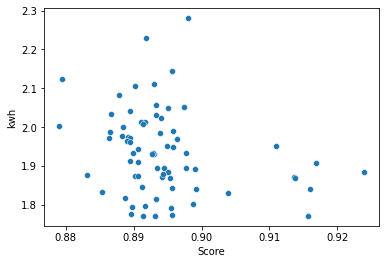

In [18]:
sns.scatterplot(merged, x="Score", y="kwh")

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(merged[["Score"]], merged[["kwh"]])

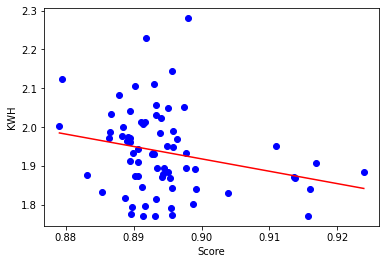

In [20]:
from scipy.stats import linregress
x = merged["Score"]
y = merged["kwh"]
gradient, intercept, r_value, p_value, std_err = linregress(merged["Score"], merged["kwh"])
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.ylabel("KWH")
plt.xlabel("Score")
plt.show()

In [29]:
merged["1/kwh"] = np.sqrt(merged["kwh"])

<AxesSubplot:xlabel='Score', ylabel='1/kwh'>

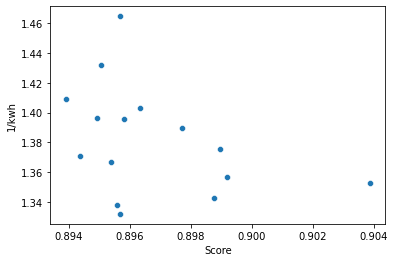

In [30]:
sns.scatterplot(merged, x="Score", y="1/kwh")

In [39]:
actions = {"Score": 'mean', "Date Time": 'first',}
asdf = confident_traffic.groupby(["Date", "Segment ID"], as_index=False).agg(actions)
# asdf["Date Time notz"] = asdf["Date Time"].dt.tz_convert(None)
asdf["hour"] = asdf["Date Time"].dt.hour
hour_scores = asdf.groupby("hour", as_index=False)["Score"].apply(np.mean)

<AxesSubplot:xlabel='hour', ylabel='Score'>

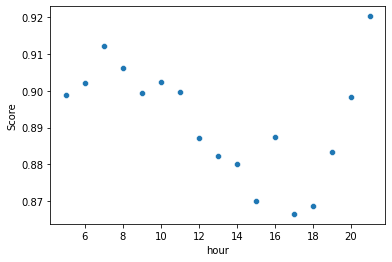

In [40]:
sns.scatterplot(data=hour_scores, x="hour", y="Score")

In [41]:
merged.drop("1/kwh", axis=1).to_csv("kwh_vs_traffic_score.csv")

In [42]:
day_scores.to_csv("daily_traffic_scores.csv")
kwh_by_date.to_csv("daily_kwh.csv")

In [43]:
traffic.to_csv("traffic_data.csv.gz", compression="gzip")

d:\Projects\Capstone\traffic data\santa_clara_study_2020-01-01_to_2020-03-02_60_min_part_1\traffic_scores.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matches_bools = meta["Intersection"].str.contains(matches_regex, na=False, regex=True)


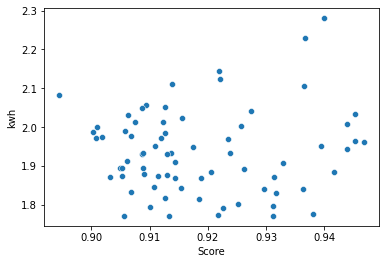

In [1]:
from traffic_scores import *

kws = kwh_vs_score(load_traffic(), load_kwh())

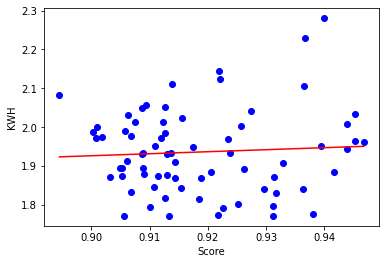

In [2]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
x = kws["Score"]
y = kws["kwh"]
gradient, intercept, r_value, p_value, std_err = linregress(kws["Score"], kws["kwh"])
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.ylabel("KWH")
plt.xlabel("Score")
plt.show()

In [5]:
# average segment scores, do feature selection to see
# which segments correlate most closely with KWH

r_value

0.004033806089294755